In [1]:

#Mongodb
#pip install pymongo
import pymongo


client = pymongo.MongoClient("mongodb://localhost:27017")


import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing





#Random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import keras

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)



df = pd.read_csv('Airline_Delay_Cause.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [2]:
df_1 = df.rename(columns={"arr_flights":"Number of flight arriving at airport", "arr_del15":"Number of flight more than 15 minutes late", "carrier_ct":"Number of flights delayed due to air carrier", "weather_ct":"Number of flights delayed due to weather", "nas_ct":"Number of flights delayed due to National Aviation System", "security_ct":"Number of flights delayed due to security", "late_aircraft_ct":"Number of flights delayed as a result of another flight on the same aircraft delayed", "arr_cancelled":"Number of flights cancelled", "arr_diverted":"Number of flights that were diverted", "arr_delay":"Total time of delayed flight", "carrier_delay":"Total time of delayed flight due to carrier", "weather_delay":"Total time of delayed flight due to weather", "nas_delay":"Total time of delayed flight due to national aviation system", "security_delay":"Total time of delayed flight due to security", "late_aircraft_delay":"Total number of time delayed flight as a result of a former flight on the same airplane being late"},inplace=True)

df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [3]:
df = df.fillna(df.mean())
df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [4]:
# Convert the 'Total time of delayed flight' column to float64 data type
df['Total time of delayed flight'] = df['Total time of delayed flight'].astype('float64')


df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [5]:
#convert the minutes into hour

import math



for index, row in df.iterrows():
    df.loc[index, 'Total time of delayed flight in hour'] = math.floor(row['Total time of delayed flight'] // 60)
    

    

df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Total time of delayed flight in hour
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0,2.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0,27.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0,25.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0,10.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0,41.0


In [6]:
# Create a new column called 'delayed' based on the values of the 'Total time of delayed flight in hour' column
df['Delayed'] = df['Total time of delayed flight in hour'].apply(lambda x: 0 if x == 0 else 1)

# Display the updated DataFrame
#print(df.head())
df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Total time of delayed flight in hour,Delayed
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0,2.0,1
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0,27.0,1
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0,25.0,1
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0,10.0,1
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0,41.0,1


In [7]:
#Airlines Name Count


carrier_count = df['carrier_name'].value_counts()
carrier_count

SkyWest Airlines Inc.       14919
Delta Air Lines Inc.         9045
Envoy Air                    6753
American Airlines Inc.       6722
Allegiant Air                6682
United Air Lines Inc.        6517
Southwest Airlines Co.       6161
Frontier Airlines Inc.       5718
Mesa Airlines Inc.           5293
Endeavor Air Inc.            5172
Alaska Airlines Inc.         4784
Republic Airline             4607
PSA Airlines Inc.            4406
JetBlue Airways              4223
ExpressJet Airlines Inc.     3291
Spirit Air Lines             3100
ExpressJet Airlines LLC      1436
Hawaiian Airlines Inc.       1203
Horizon Air                   929
Virgin America                354
Name: carrier_name, dtype: int64

In [8]:
SkyWest_Airlines_Inc = df['carrier_name'] == 'SkyWest Airlines Inc.'

df = df[SkyWest_Airlines_Inc]

df

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Total time of delayed flight in hour,Delayed
1022,2022,7,OO,SkyWest Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",76.0,28.0,22.00,6.00,0.00,0.0,0.00,4.0,0.0,2884.0,2018.0,866.0,0.0,0.0,0.0,48.0,1
1023,2022,7,OO,SkyWest Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",329.0,44.0,41.00,1.00,1.00,0.0,1.00,1.0,2.0,2258.0,1990.0,86.0,58.0,0.0,124.0,37.0,1
1024,2022,7,OO,SkyWest Airlines Inc.,ABR,"Aberdeen, SD: Aberdeen Regional",62.0,7.0,6.00,1.00,0.00,0.0,0.00,0.0,0.0,446.0,425.0,21.0,0.0,0.0,0.0,7.0,1
1025,2022,7,OO,SkyWest Airlines Inc.,ACV,"Arcata/Eureka, CA: California Redwood Coast Hu...",184.0,14.0,10.00,1.00,1.00,0.0,2.00,9.0,3.0,1870.0,978.0,775.0,52.0,0.0,65.0,31.0,1
1026,2022,7,OO,SkyWest Airlines Inc.,ALB,"Albany, NY: Albany International",102.0,14.0,11.00,0.00,1.00,0.0,2.00,0.0,0.0,712.0,585.0,0.0,41.0,0.0,86.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101115,2017,1,OO,SkyWest Airlines Inc.,TVC,"Traverse City, MI: Cherry Capital",163.0,49.0,19.18,3.29,14.51,0.0,12.02,9.0,1.0,2862.0,1674.0,143.0,485.0,0.0,560.0,47.0,1
101116,2017,1,OO,SkyWest Airlines Inc.,TWF,"Twin Falls, ID: Joslin Field - Magic Valley Re...",89.0,18.0,0.87,2.35,12.47,0.0,2.30,1.0,0.0,1266.0,45.0,662.0,508.0,0.0,51.0,21.0,1
101117,2017,1,OO,SkyWest Airlines Inc.,TYS,"Knoxville, TN: McGhee Tyson",4.0,2.0,0.00,0.83,0.40,0.0,0.76,0.0,0.0,173.0,0.0,130.0,30.0,0.0,13.0,2.0,1
101118,2017,1,OO,SkyWest Airlines Inc.,XNA,"Fayetteville, AR: Northwest Arkansas Regional",141.0,41.0,9.58,0.15,10.43,0.0,20.84,3.0,1.0,3371.0,594.0,7.0,423.0,0.0,2347.0,56.0,1


In [9]:
x=df.iloc[:,0:22].values #taken first to last column
y=df.iloc[:,22].values #have taken only last column

In [10]:
x

array([[2022, 7, 'OO', ..., 0.0, 0.0, 48.0],
       [2022, 7, 'OO', ..., 0.0, 124.0, 37.0],
       [2022, 7, 'OO', ..., 0.0, 0.0, 7.0],
       ...,
       [2017, 1, 'OO', ..., 0.0, 13.0, 2.0],
       [2017, 1, 'OO', ..., 0.0, 2347.0, 56.0],
       [2017, 1, 'OO', ..., 0.0, 331.0, 19.0]], dtype=object)

In [11]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder_carrier = LabelEncoder()
label_encoder_carrier_name = LabelEncoder()
label_encoder_airport = LabelEncoder()
label_encoder_airport_name = LabelEncoder()
x[:,2] = label_encoder_carrier.fit_transform(x[:,2])
x[:,3] = label_encoder_carrier_name.fit_transform(x[:,3])
x[:,4] = label_encoder_airport.fit_transform(x[:,4])
x[:,5] = label_encoder_airport_name.fit_transform(x[:,5])



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standard = scaler.fit_transform(x)
x_standard[0]

array([ 1.61737255,  0.20428913,  0.        ,  0.        , -1.75978424,
       -1.66127236, -0.28188169, -0.12019656,  0.12597094,  0.35735257,
       -0.22559676, -0.20457616, -0.30256264, -0.05735699, -0.24288184,
       -0.05066808,  0.10458283,  0.45559712, -0.17078819, -0.11477587,
       -0.28343879, -0.04848568])

In [13]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x)


x_normalization = norm.transform(x)
x_normalization

array([[1.00000000e+00, 5.45454545e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.36286201e-02],
       [1.00000000e+00, 5.45454545e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.31378200e-03, 1.05053947e-02],
       [1.00000000e+00, 5.45454545e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.98750710e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.37735209e-04, 5.67859171e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.48665028e-02, 1.59000568e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.50695033e-03, 5.39466212e-03]])

In [14]:

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_normalization, y, test_size=0.3, random_state=0)


In [15]:
x_test.shape

(4476, 22)

In [16]:
y_test.shape

(4476,)

In [17]:
#Building Decision Tree Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)


# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)



#Predict the response for test dataset
y_pred = clf.predict(x_test)



# Model Accuracy, how often is the classifier correct?
print("Accuracy_d:",metrics.accuracy_score(y_test, y_pred))

Accuracy_d: 1.0


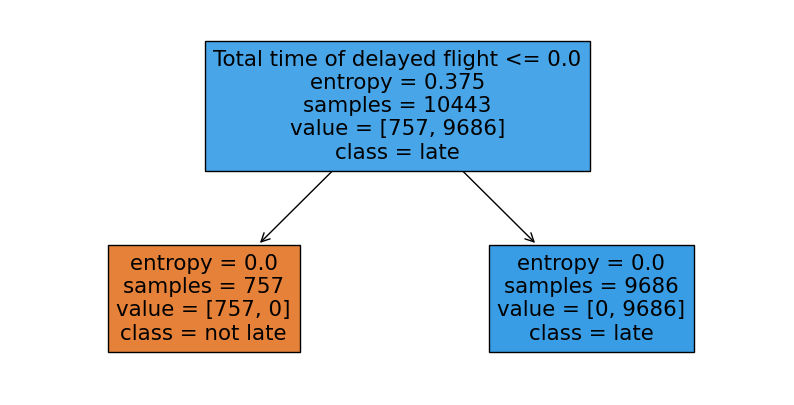

In [18]:
from sklearn import tree
fig = plt.figure(figsize=(10,5))
tree.plot_tree(clf, feature_names = df.columns[:-1], class_names=['not late', 'late'], filled=True);

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00      4131

    accuracy                           1.00      4476
   macro avg       1.00      1.00      1.00      4476
weighted avg       1.00      1.00      1.00      4476



Total time of delayed flight                                                                          1.0
year                                                                                                  0.0
month                                                                                                 0.0
Total number of time delayed flight as a result of a former flight on the same airplane being late    0.0
Total time of delayed flight due to security                                                          0.0
Total time of delayed flight due to national aviation system                                          0.0
Total time of delayed flight due to weather                                                           0.0
Total time of delayed flight due to carrier                                                           0.0
Number of flights that were diverted                                                                  0.0
Number of flights cancelled                   

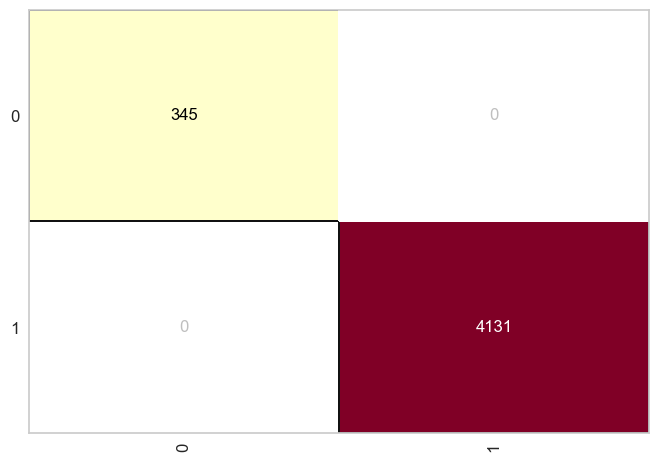

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(clf)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

classification_clf = (classification_report(y_test, y_pred))
print(classification_clf)


columns = df.iloc[:, 0:22].columns
feature = pd.Series(clf.feature_importances_, index = columns).sort_values(ascending = False)
feature

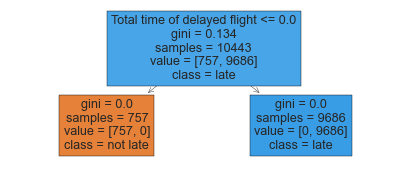

In [20]:
clf_1 = DecisionTreeClassifier(max_depth = 3, random_state = 0)
clf_1 = clf_1.fit(x_train,y_train)
DecisionTreeClassifier(max_depth = 3, random_state = 0)
pred_1 = clf_1.predict(x_test)

fig = plt.figure(figsize=(5,2))
tree.plot_tree(clf_1, feature_names = df.columns[:-1], class_names=['not late', 'late'], filled=True);








              precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00      4131

    accuracy                           1.00      4476
   macro avg       1.00      1.00      1.00      4476
weighted avg       1.00      1.00      1.00      4476



Total time of delayed flight                                                                          1.0
year                                                                                                  0.0
month                                                                                                 0.0
Total number of time delayed flight as a result of a former flight on the same airplane being late    0.0
Total time of delayed flight due to security                                                          0.0
Total time of delayed flight due to national aviation system                                          0.0
Total time of delayed flight due to weather                                                           0.0
Total time of delayed flight due to carrier                                                           0.0
Number of flights that were diverted                                                                  0.0
Number of flights cancelled                   

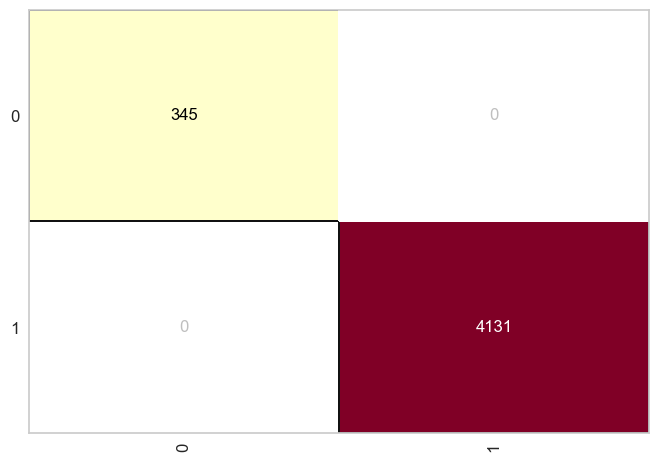

In [21]:



cm_1 = ConfusionMatrix(clf_1)
cm_1.fit(x_train, y_train)
cm_1.score(x_test, y_test)

classification_clf_1 = (classification_report(y_test, pred_1))
print(classification_clf_1)


columns_1 = df.iloc[:, 0:22].columns
feature_1 = pd.Series(clf_1.feature_importances_, index = columns).sort_values(ascending = False)
feature_1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00      4131

    accuracy                           1.00      4476
   macro avg       1.00      1.00      1.00      4476
weighted avg       1.00      1.00      1.00      4476



Total time of delayed flight in hour                                                                  0.298240
Total time of delayed flight                                                                          0.248778
Number of flight more than 15 minutes late                                                            0.124011
Total time of delayed flight due to carrier                                                           0.119751
Total number of time delayed flight as a result of a former flight on the same airplane being late    0.069225
Number of flights delayed due to air carrier                                                          0.048437
Number of flight arriving at airport                                                                  0.036107
Number of flights delayed as a result of another flight on the same aircraft delayed                  0.018744
Number of flights delayed due to weather                                                              0.013608
N

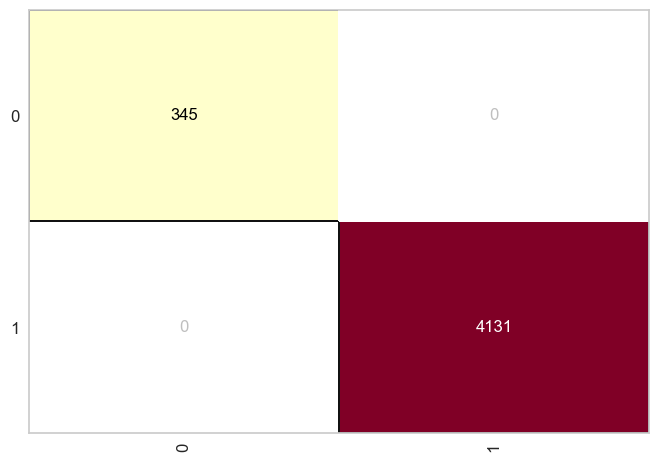

In [22]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth = 3, criterion = 'entropy', random_state = 0)
random_forest.fit(x_train, y_train)
RandomForestClassifier(max_depth = 3, criterion = 'entropy', random_state = 0)
predict = random_forest.predict(x_test)


cm_2 = ConfusionMatrix(random_forest)
cm_2.fit(x_train, y_train)
cm_2.score(x_test, y_test)


classification_clf_2 = (classification_report(y_test, predict))
print(classification_clf_2)

columns_2 = df.iloc[:, 0:22].columns
feature_2 = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00      4131

    accuracy                           1.00      4476
   macro avg       1.00      1.00      1.00      4476
weighted avg       1.00      1.00      1.00      4476



Total time of delayed flight in hour                                                                  0.318509
Total time of delayed flight                                                                          0.264180
Number of flight more than 15 minutes late                                                            0.136455
Total time of delayed flight due to carrier                                                           0.101796
Number of flights delayed due to air carrier                                                          0.051927
Total number of time delayed flight as a result of a former flight on the same airplane being late    0.047943
Number of flight arriving at airport                                                                  0.043091
Number of flights delayed as a result of another flight on the same aircraft delayed                  0.010992
Number of flights delayed due to weather                                                              0.008563
T

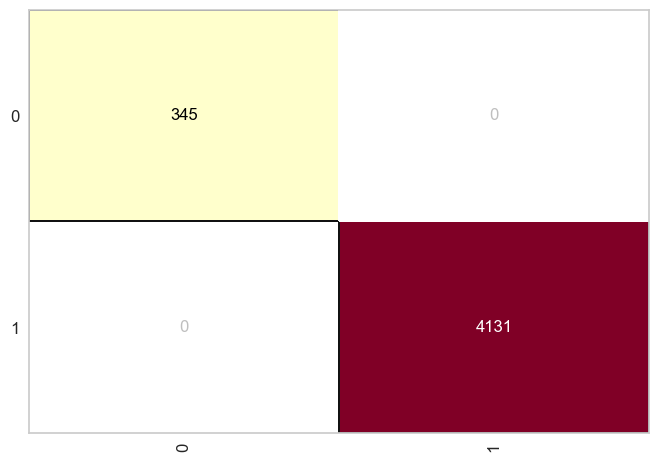

In [23]:
random_forest_1 = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 0)
random_forest_1.fit(x_train, y_train)

predict_1 = random_forest_1.predict(x_test)

cm_3 = ConfusionMatrix(random_forest_1)
cm_3.fit(x_train, y_train)
cm_3.score(x_test, y_test)

classification_clf_3 = (classification_report(y_test, predict_1))
print(classification_clf_3)

columns_3 = df.iloc[:, 0:22].columns
feature_3 = pd.Series(random_forest_1.feature_importances_, index = columns).sort_values(ascending = False)
feature_3

              precision    recall  f1-score   support

           0       0.34      0.09      0.14       345
           1       0.93      0.99      0.96      4131

    accuracy                           0.92      4476
   macro avg       0.64      0.54      0.55      4476
weighted avg       0.88      0.92      0.89      4476



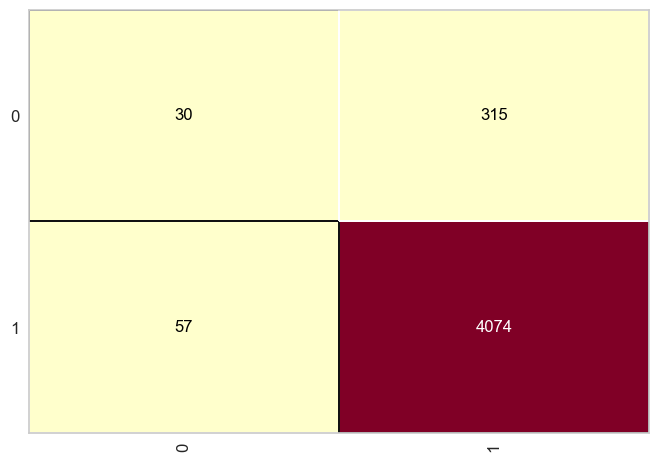

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = 'minkowski', p=2)

k_list = list(range(1,31))
k_values = dict(n_neighbors = k_list)


from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')
grid.fit(x_train, y_train)



grid.best_params_

grid.best_score_

knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p=2)
knn.fit(x_train, y_train)


predict_4 = knn.predict(x_test)


cm_4 = ConfusionMatrix(knn)
cm_4.fit(x_train, y_train)
cm_4.score(x_test, y_test)

classification_knn = (classification_report(y_test, predict_4))
print(classification_knn)




In [25]:
df

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Total time of delayed flight in hour,Delayed
1022,2022,7,OO,SkyWest Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",76.0,28.0,22.00,6.00,0.00,0.0,0.00,4.0,0.0,2884.0,2018.0,866.0,0.0,0.0,0.0,48.0,1
1023,2022,7,OO,SkyWest Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",329.0,44.0,41.00,1.00,1.00,0.0,1.00,1.0,2.0,2258.0,1990.0,86.0,58.0,0.0,124.0,37.0,1
1024,2022,7,OO,SkyWest Airlines Inc.,ABR,"Aberdeen, SD: Aberdeen Regional",62.0,7.0,6.00,1.00,0.00,0.0,0.00,0.0,0.0,446.0,425.0,21.0,0.0,0.0,0.0,7.0,1
1025,2022,7,OO,SkyWest Airlines Inc.,ACV,"Arcata/Eureka, CA: California Redwood Coast Hu...",184.0,14.0,10.00,1.00,1.00,0.0,2.00,9.0,3.0,1870.0,978.0,775.0,52.0,0.0,65.0,31.0,1
1026,2022,7,OO,SkyWest Airlines Inc.,ALB,"Albany, NY: Albany International",102.0,14.0,11.00,0.00,1.00,0.0,2.00,0.0,0.0,712.0,585.0,0.0,41.0,0.0,86.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101115,2017,1,OO,SkyWest Airlines Inc.,TVC,"Traverse City, MI: Cherry Capital",163.0,49.0,19.18,3.29,14.51,0.0,12.02,9.0,1.0,2862.0,1674.0,143.0,485.0,0.0,560.0,47.0,1
101116,2017,1,OO,SkyWest Airlines Inc.,TWF,"Twin Falls, ID: Joslin Field - Magic Valley Re...",89.0,18.0,0.87,2.35,12.47,0.0,2.30,1.0,0.0,1266.0,45.0,662.0,508.0,0.0,51.0,21.0,1
101117,2017,1,OO,SkyWest Airlines Inc.,TYS,"Knoxville, TN: McGhee Tyson",4.0,2.0,0.00,0.83,0.40,0.0,0.76,0.0,0.0,173.0,0.0,130.0,30.0,0.0,13.0,2.0,1
101118,2017,1,OO,SkyWest Airlines Inc.,XNA,"Fayetteville, AR: Northwest Arkansas Regional",141.0,41.0,9.58,0.15,10.43,0.0,20.84,3.0,1.0,3371.0,594.0,7.0,423.0,0.0,2347.0,56.0,1


In [26]:
data = df.to_dict(orient = "records") #converting data into dictionary
data

[{'year': 2022,
  'month': 7,
  'carrier': 'OO',
  'carrier_name': 'SkyWest Airlines Inc.',
  'airport': 'ABE',
  'airport_name': 'Allentown/Bethlehem/Easton, PA: Lehigh Valley International',
  'Number of flight arriving at airport': 76.0,
  'Number of flight more than 15 minutes late': 28.0,
  'Number of flights delayed due to air carrier': 22.0,
  'Number of flights delayed due to weather': 6.0,
  'Number of flights delayed due to National Aviation System': 0.0,
  'Number of flights delayed due to security': 0.0,
  'Number of flights delayed as a result of another flight on the same aircraft delayed': 0.0,
  'Number of flights cancelled': 4.0,
  'Number of flights that were diverted': 0.0,
  'Total time of delayed flight': 2884.0,
  'Total time of delayed flight due to carrier': 2018.0,
  'Total time of delayed flight due to weather': 866.0,
  'Total time of delayed flight due to national aviation system': 0.0,
  'Total time of delayed flight due to security': 0.0,
  'Total number o

In [27]:
db = client.SkyWest_Airlines_Inc_delay_prediction
print(db)



Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'SkyWest_Airlines_Inc_delay_prediction')


In [ ]:
db.SkyWest_Airlines_Inc_delay_prediction.insert_many(data)